In [1]:
#Dependencies
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier


In [2]:
#load in datasets
matches = pd.read_csv("Resources/epl_matches_combined.csv", index_col=0) 
matches.head()


,venue_code,opp_code,hour,day_code,team_code,season,round,date,time,day,...,last_3_ga_2,last_3_avg_poss_2,last_3_avg_sot_2,opp_last_3_gd,last_3_gd_diff,last_3_avg_poss_diff,last_3_avg_sot_diff,last_3_results_diff,target,target_2
0,0,26,14,6,1,2024,29,2024-03-17,14:00,Sun,...,9.0,46.000000,5.000000,-4.0,3.0,2.000000,0.000000,-1.0,-1.0,0.0
1,1,1,14,6,26,2024,29,2024-03-17,14:00,Sun,...,7.0,48.000000,5.000000,1.0,3.0,-2.000000,0.000000,0.0,-1.0,0.0
2,1,23,17,5,10,2024,29,2024-03-16,17:30,Sat,...,8.0,72.333333,5.000000,-5.0,8.0,-30.666667,0.333333,0.0,1.0,-1.0
3,1,3,15,5,5,2024,29,2024-03-16,15:00,Sat,...,5.0,40.333333,5.333333,3.0,-8.0,15.000000,-2.333333,-1.0,1.0,-1.0
4,0,15,15,5,20,2024,29,2024-03-16,15:00,Sat,...,4.0,45.666667,3.000000,4.0,-8.0,-9.000000,0.000000,-1.0,-1.0,0.0


In [4]:
# #random forest classifierf
# Define the list of predictors including venue code, opponent code, hour, and day code.
predictors = ['venue_code', 'opp_code', 'hour', 'day_code','team_code','last_3_results','last_3_results_2', 'xg', 'xga', 'xg_2', 'xga_2' ]
            #'formation_code','last_3_results','last_3_results_2'
            #  'formation_code_2', 
            #  , 'last_3_gf', 'last_3_ga','last_3_avg_poss', 'last_3_avg_sot', 'last_3_gd', 
            #  ,'last_3_gf_2', 'last_3_ga_2', 'last_3_avg_poss_2', 'last_3_avg_sot_2','opp_last_3_gd', 
            #  'last_3_gd_diff', 'last_3_avg_poss_diff','last_3_avg_sot_diff', 'last_3_results_diff'


#  'xg', 'xga'
# 'xg_2', 'xga_2'

# # Define the features (predictors) and the target variable
X = matches[predictors]
y = matches["target"]

# # Split the data into training and testing sets with a ratio of 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# # Initialize a Random Forest classifier with 50 trees, minimum samples split of 10, and a fixed random state.
rf_model = RandomForestClassifier(n_estimators=50, max_depth=10, min_samples_split=10, random_state=1)

# # Train the Random Forest classifier on the training data using specified predictors.
rf_model = rf_model.fit(X_train, y_train)

In [5]:
# Generate predictions using the trained Random Forest classifier on the test data using specified predictors.
# # Train the Random Forest classifier on the training data using specified predictors.
preds = rf_model.predict(X_test)


In [6]:
# Evaluate the best model on the training set
train_accuracy = rf_model.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

# Evaluate the best model on the test set
test_accuracy = rf_model.score(X_test, y_test)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.8599476439790575
Testing Accuracy: 0.7358778625954199


In [7]:
# Initialize Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=3, random_state=1)
# Train Gradient Boosting Classifier on the training data
gb_model.fit(X_train, y_train)
# Predictions
gb_preds = gb_model.predict(X_test)
gb_preds_train = gb_model.predict(X_train)
# Reshape the gb_preds_train array
gb_preds_train = gb_preds_train.reshape(-1, 1)
# Reshape the gb_preds array
gb_preds = gb_preds.reshape(-1, 1)
# Evaluate the best model on the training set
boost_train_accuracy = gb_model.score(X_train, y_train)
print("Training Accuracy:", boost_train_accuracy)
# Evaluate the best model on the test set
boost_test_accuracy = gb_model.score(X_test, y_test)
print("Testing Accuracy:", boost_test_accuracy)

Training Accuracy: 0.762107329842932
Testing Accuracy: 0.749618320610687


In [ ]:
# Create a contingency table showing the counts of actual versus predicted labels
combined = pd.DataFrame({"actual": y_test, "prediction": preds})
pd.crosstab(index=combined["actual"], columns=combined["prediction"])

prediction,-1.0,1.0
actual,,
-1.0,670,146
1.0,315,179


In [ ]:
# determine which feature explains the most variance in the model
importances = rf_model.feature_importances_
# return the original feature names
feature_names = X.columns
#create a DataFrame to display the feature importance
feature_importance = pd.DataFrame({"feature": feature_names, "importance": importances})
feature_importance

,feature,importance
0,venue_code,0.038204
1,opp_code,0.331508
2,hour,0.135582
3,day_code,0.112991
4,team_code,0.381715


<Axes: xlabel='importance', ylabel='feature'>

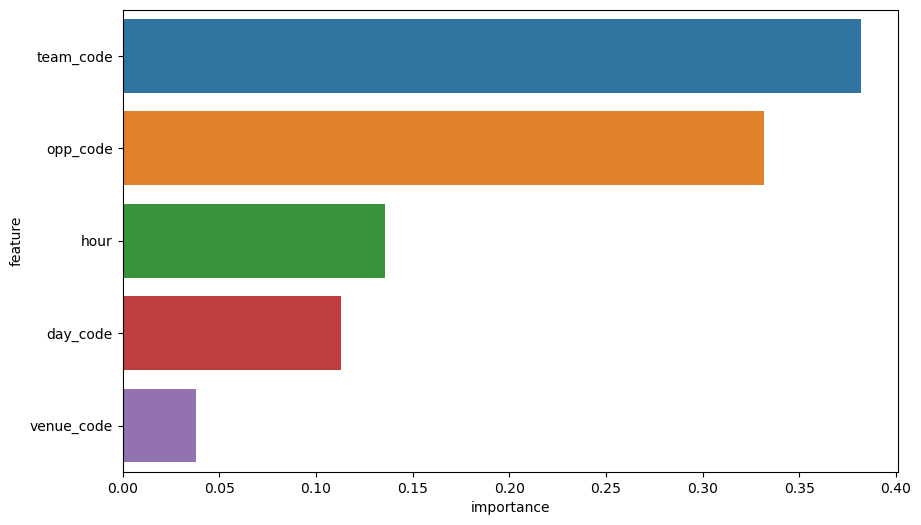

In [ ]:
#create a bar plot to visualize the feature importance
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(x="importance", y="feature", data=feature_importance.sort_values(by="importance", ascending=False))

In [ ]:
# Generate classification report
print(classification_report(y_test, preds))


              precision    recall  f1-score   support

        -1.0       0.68      0.82      0.74       816
         1.0       0.55      0.36      0.44       494

    accuracy                           0.65      1310
   macro avg       0.62      0.59      0.59      1310
weighted avg       0.63      0.65      0.63      1310



# Prediction Based on User Selection

In [ ]:
#turns the user input into a dataframe
user_input_columns = ["venue_code", "opp_code", "hour", "day_code", 'team_code']
user_input = pd.read_csv("./Resources/user_input.csv")
user_input


FileNotFoundError: [Errno 2] No such file or directory: './Resources/user_input.csv'

In [ ]:
team_1_columns = ['Team_1','formation_code',
'last_3_results',
'last_3_gf',
'last_3_ga',
'last_3_avg_poss',
'last_3_avg_sot', 'date']


team_2_columns= ['Team_2','formation_code_2',
                'last_3_results_2',
                'last_3_gf_2', 
                'last_3_ga_2', 
                'last_3_avg_poss_2', 
                'last_3_avg_sot_2', 'date']



In [ ]:
# Defining the teams list and their corresponding codes
teams_list = ['Arsenal', 'Aston Villa',
              'Bournemouth', 'Brentford', 'Brighton and Hove Albion', 'Burnley',
              'Cardiff City', 'Chelsea', 'Crystal Palace',
              'Everton',
              'Fulham',
              'Huddersfield Town',
              'Leeds United', 'Leicester City', 'Liverpool', 'Luton Town',
              'Manchester City', 'Manchester United',
              'Newcastle United', 'Norwich City', 'Nottingham Forest',
              'Sheffield United', 'Southampton',
              'Tottenham Hotspur',
              'Watford', 'West Bromwich Albion', 'West Ham United', 'Wolverhampton Wanderers'
              ]

In [ ]:
# Assuming is your DataFrame, 'team_name' is the name of the team, and 'team' is the column with team names
# subtract 1 from the team code in the User_input dataframe to get the team name from the teams_list and store as a veriable
team_1_name = teams_list[user_input["team_code"].values[0] - 1]
team_1_data = matches.loc[matches['Team_1'] == team_1_name, team_1_columns]
# subtract 1 from the opp_code in the User_input dataframe to get the team name from the teams_list and store as a veriable
team_2_name = teams_list[user_input["opp_code"].values[0] - 1]
team_2_data = matches.loc[matches['Team_2'] == team_2_name, team_2_columns]
# Get the last row
last_values_1 = team_1_data.iloc[0]
last_values_2 = team_2_data.iloc[0]

#create a new DataFrame with the last values 1 using the 'team_1_columns' as column names
team_1_last_values = pd.DataFrame(last_values_1.values.reshape(1, -1), columns=team_1_columns)
display(team_1_last_values)
#create a new DataFrame with the last values 2 using the 'opponent_column_headings' as column names
team_2_last_values = pd.DataFrame(last_values_2.values.reshape(1, -1), columns=team_2_columns)
display(team_2_last_values)
#create a new dataframe with the user input using the 'user_input_columns' as column names
user_input_df = pd.DataFrame(np.array(user_input).reshape(1, -1), columns=user_input_columns)
display(user_input_df)

,Team_1,formation_code,last_3_results,last_3_gf,last_3_ga,last_3_avg_poss,last_3_avg_sot,date
0,Sheffield United,7,-3.0,0.0,12.0,26.0,1.666667,2024-03-09


,Team_2,formation_code_2,last_3_results_2,last_3_gf_2,last_3_ga_2,last_3_avg_poss_2,last_3_avg_sot_2,date
0,Brentford,7,-2.0,8.0,5.0,40.333333,5.333333,2024-03-16


,venue_code,opp_code,hour,day_code,team_code
0,0,4,12,4,22


In [ ]:
#concatenate the 'user_input_df''team_1_last_values', and 'team_2_last_values', DataFrames along the columns
#combined_df = pd.concat([user_input_df, team_1_last_values, team_2_last_values], axis=1)
combined_df = pd.concat([user_input_df,team_1_last_values, team_2_last_values], axis=1)
combined_df

,venue_code,opp_code,hour,day_code,team_code,Team_1,formation_code,last_3_results,last_3_gf,last_3_ga,...,last_3_avg_sot,date,Team_2,formation_code_2,last_3_results_2,last_3_gf_2,last_3_ga_2,last_3_avg_poss_2,last_3_avg_sot_2,date
0,0,4,12,4,22,Sheffield United,7,-3.0,0.0,12.0,...,1.666667,2024-03-09,Brentford,7,-2.0,8.0,5.0,40.333333,5.333333,2024-03-16


In [ ]:
#Calculate the comparison stats and add them to the dataframecomparison Stats
def calculate_differentials(combined_df, window):
    # Calculate the stat difference between the team and the opponent
    combined_df['last_{}_gd'.format(window)] = combined_df['last_{}_gf'.format(window)] - combined_df['last_{}_ga'.format(window)]
    combined_df['opp_last_{}_gd'.format(window)] = combined_df['last_{}_gf_2'.format(window)] - combined_df['last_{}_ga_2'.format(window)]
    combined_df['last_{}_gd_diff'.format(window)] = combined_df['last_{}_gd'.format(window)] - combined_df['opp_last_{}_gd'.format(window)]
    combined_df['last_{}_avg_poss_diff'.format(window)] = combined_df['last_{}_avg_poss'.format(window)] - combined_df['last_{}_avg_poss_2'.format(window)]
    combined_df['last_{}_avg_sot_diff'.format(window)] = combined_df['last_{}_avg_sot'.format(window)] - combined_df['last_{}_avg_sot_2'.format(window)]
    combined_df['last_{}_results_diff'.format(window)] = combined_df['last_{}_results'.format(window)] - combined_df['last_{}_results_2'.format(window)]
    return combined_df


combined_df = calculate_differentials(combined_df, 3)
combined_df.head()

,venue_code,opp_code,hour,day_code,team_code,Team_1,formation_code,last_3_results,last_3_gf,last_3_ga,...,last_3_ga_2,last_3_avg_poss_2,last_3_avg_sot_2,date,last_3_gd,opp_last_3_gd,last_3_gd_diff,last_3_avg_poss_diff,last_3_avg_sot_diff,last_3_results_diff
0,0,4,12,4,22,Sheffield United,7,-3.0,0.0,12.0,...,5.0,40.333333,5.333333,2024-03-16,-12.0,3.0,-15.0,-14.333333,-3.666667,-1.0


In [ ]:
#rearrange the columns to match the order of the predictors
combined_df = combined_df[predictors]

In [ ]:
preds = rf_model.predict(combined_df)
preds

array([-1.])